In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, precision_score, recall_score,classification_report
import shap
shap.initjs()

import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import cv2

In [18]:
df_kdd_mc_21 = pd.read_csv('../../src/data/performance/KDDCUP_MultiClass_v1_21.csv').drop('Unnamed: 0',axis=1)
df_kdd_mc_32 = pd.read_csv('../../src/data/performance/KDDCUP_MultiClass_v2_32.csv').drop('Unnamed: 0',axis=1)
df_average_21 = df_kdd_mc_21.groupby(['Technique', 'k'],as_index=False).agg('mean')[['Technique', 'k', 'Accuracy', 'F1_Score', 'Precision', 'Recall']]
df_average_32 = df_kdd_mc_32.groupby(['Technique', 'k'],as_index=False).agg('mean')[['Technique', 'k', 'Accuracy', 'F1_Score', 'Precision', 'Recall']]

In [25]:
df_11 = df_average_32[df_average_32['k']==11].set_index('Technique')
df_21 = df_average_21[df_average_21['k']==21].set_index('Technique')
df_28 = df_average_21[df_average_21['k']==28].set_index('Technique')
df_32 = df_average_32[df_average_32['k']==32].set_index('Technique')

In [42]:
df_21

,k,Accuracy,F1_Score,Precision,Recall
Technique,,,,,
Correlation,21,0.922732,0.936202,0.951514,0.922732
MI,21,0.945033,0.967681,0.994193,0.945033
RF Feature Importance,21,0.952453,0.971685,0.993499,0.952453
SHAP,21,0.954947,0.972931,0.993067,0.954947


In [34]:
def k_plot(df,eval,k):
    plt.plot(df.index, df[eval], color='blue', marker='o')
    plt.title(f'{eval} vs Technique for k = {k}', fontsize=14)
    plt.xlabel('Technique', fontsize=14)
    plt.ylabel(f'{eval}', fontsize=14)
    plt.grid(True)
    plt.show()

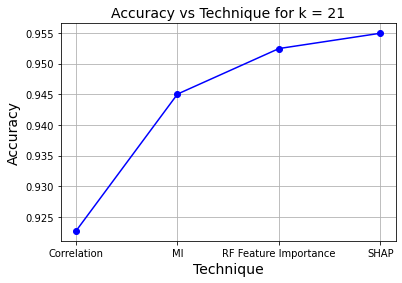

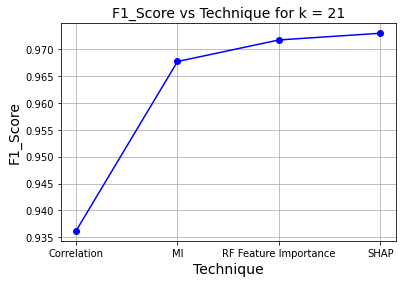

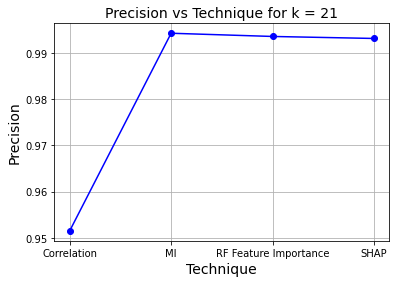

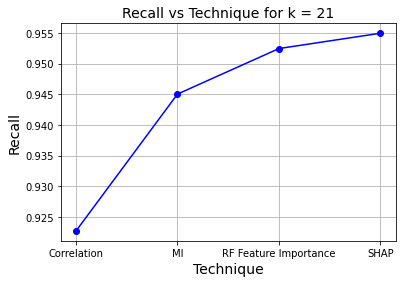

In [39]:
for eval in ['Accuracy', 'F1_Score', 'Precision', 'Recall']:
    k_plot(df_21,eval,21)

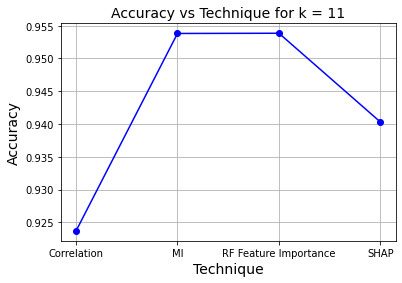

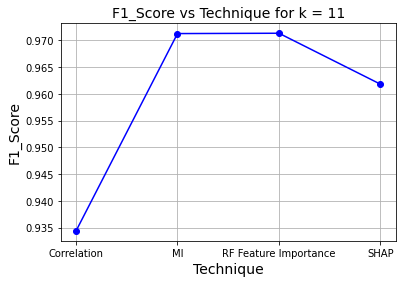

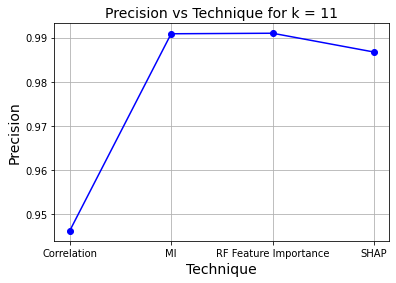

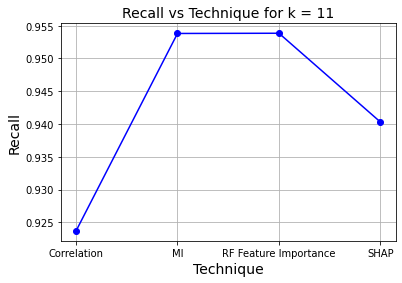

In [52]:
for eval in ['Accuracy', 'F1_Score', 'Precision', 'Recall']:
    k_plot(df_11,eval,11)

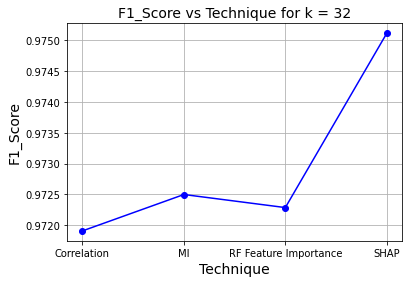

In [38]:
k_plot(df_32,'F1_Score',32)

In [58]:
df_kdd_mc = pd.read_csv('../../src/data/performance/KDDCUP_MultiClass.csv').drop('Unnamed: 0',axis=1)
df_average = df_kdd_mc.groupby(['Technique', 'k'],as_index=False).agg('mean')[['Technique', 'k', 'Accuracy', 'F1_Score', 'Precision', 'Recall']]

In [59]:
df_average

,Technique,k,Accuracy,F1_Score,Precision,Recall
0,Correlation,28,0.948889,0.964460,0.981797,0.948889
1,MI,28,0.953994,0.973291,0.995084,0.953994
2,RF Feature Importance,28,0.955861,0.973655,0.993482,0.955861
3,SHAP,28,0.952303,0.971862,0.993955,0.952303


In [60]:
df_kdd_mc

,Technique,k,HP_n_estimators,HP_max_depth,Class,Accuracy,F1_Score,Precision,Recall
0,MI,28,300,10,0,0.999159,0.995741,0.992345,0.999159
1,MI,28,300,10,1,0.992629,0.991411,0.990196,0.992629
2,MI,28,300,10,2,0.998601,0.999230,0.999860,0.998601
3,MI,28,300,10,3,0.875000,0.933333,1.000000,0.875000
4,MI,28,300,10,4,0.904580,0.946738,0.993017,0.904580
5,Correlation,28,200,10,0,0.998809,0.995009,0.991238,0.998809
6,Correlation,28,200,10,1,0.988943,0.988943,0.988943,0.988943
7,Correlation,28,200,10,2,0.998741,0.999300,0.999860,0.998741
8,Correlation,28,200,10,3,0.875000,0.901840,0.930380,0.875000
9,Correlation,28,200,10,4,0.882952,0.937205,0.998561,0.882952


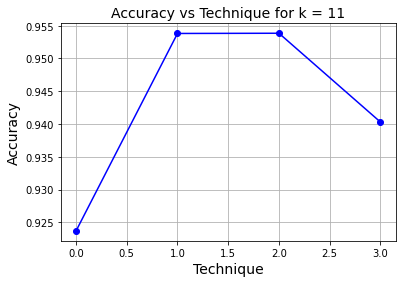

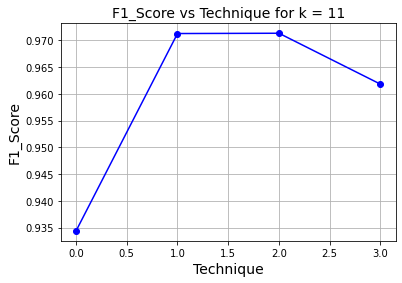

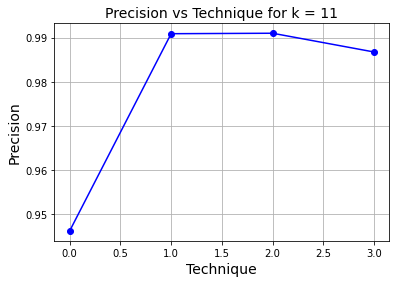

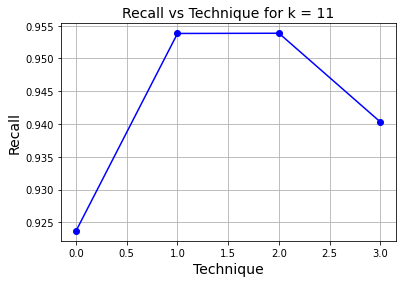

In [53]:
for eval in ['Accuracy', 'F1_Score', 'Precision', 'Recall']:
    k_plot(df_average,eval,11)

In [62]:
df_average

,Technique,k,Accuracy,F1_Score,Precision,Recall
0,Correlation,28,0.948889,0.964460,0.981797,0.948889
1,MI,28,0.953994,0.973291,0.995084,0.953994
2,RF Feature Importance,28,0.955861,0.973655,0.993482,0.955861
3,SHAP,28,0.952303,0.971862,0.993955,0.952303


In [63]:
px.bar(x=df_average['Technique'], y=df_average['Accuracy'] )

In [2]:
def Binary_Summary_Plots(image1,image2, image3, image4, title_text,k,dataset):
    
    now = datetime.now()
    print(f'{now} - Initializing {title_text} BinaryClass summary plot..')

    plt.rcParams['figure.dpi'] = 150
    fig = plt.figure(figsize=(10, 7))
    rows = 2
    columns = 2
    
    Image1 = cv2.imread(image1)
    Image2 = cv2.imread(image2)
    Image3 = cv2.imread(image3)
    Image4 = cv2.imread(image4)
    
    fig.add_subplot(rows, columns, 1)
    
    plt.imshow(Image1)
    plt.axis('off')
        
    fig.add_subplot(rows, columns, 2)
    
    plt.imshow(Image2)
    plt.axis('off')
        
    fig.add_subplot(rows, columns, 3)
    
    plt.imshow(Image3)
    plt.axis('off')
        
    fig.add_subplot(rows, columns, 4)
    
    plt.imshow(Image4)
    plt.axis('off')
    
    plt.savefig(f"{dataset}_Binary_k{str(k)}_{title_text}_Summary_Plot.png", dpi=300, bbox_inches='tight')

    now = datetime.now()
    print(f'{now} - {title_text} BinaryClass summary plot completed!')

2022-05-13 16:29:50.308521 - Initializing Confusion_Matrix BinaryClass summary plot..
2022-05-13 16:29:53.325861 - Confusion_Matrix BinaryClass summary plot completed!


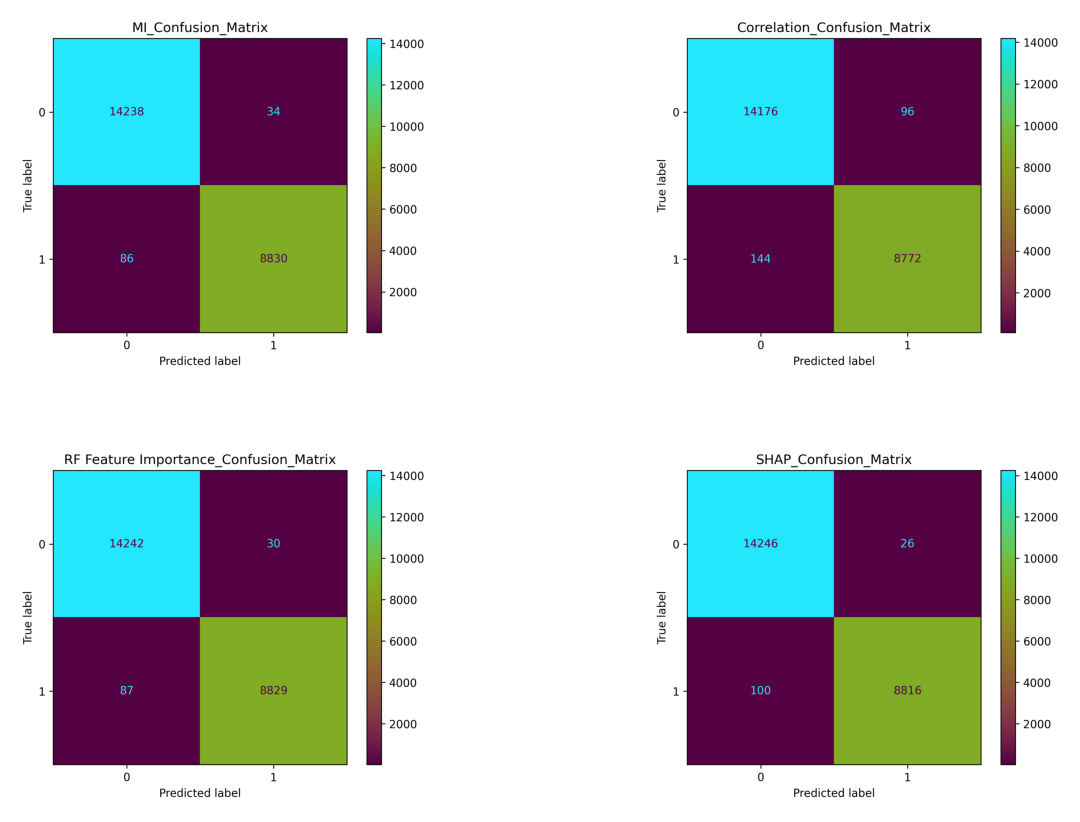

In [3]:
dataset = 'KDDCUP'
k=21

i1 = str(f'{dataset}_Binary_k{str(k)}_MI_Confusion_Matrix.png')
i2 = str(f'{dataset}_Binary_k{str(k)}_Correlation_Confusion_Matrix.png')
i3 = str(f'{dataset}_Binary_k{str(k)}_RF Feature Importance_Confusion_Matrix.png')
i4 = str(f'{dataset}_Binary_k{str(k)}_SHAP_Confusion_Matrix.png')
Binary_Summary_Plots(i1,i2,i3,i4, 'Confusion_Matrix',k,dataset)